In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

In [122]:
df=pd.read_csv("dataset_.csv")

In [123]:
df.head()

,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   object 
 5   region           1338 non-null   object 
 6   medical charges  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [125]:
df.describe()

,age,bmi,children,medical charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [126]:
df.shape

(1338, 7)

In [127]:
df.isna().sum()

age                0
sex                0
bmi                0
children           0
smoker             0
region             0
medical charges    0
dtype: int64

In [128]:
df.duplicated().sum()

1

In [129]:
df = df.drop_duplicates()

In [130]:
cat_columns = df.select_dtypes(include='object').columns
for col in cat_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Column: sex
sex
male      675
female    662
Name: count, dtype: int64
------------------------------
Column: smoker
smoker
no     1063
yes     274
Name: count, dtype: int64
------------------------------
Column: region
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
------------------------------


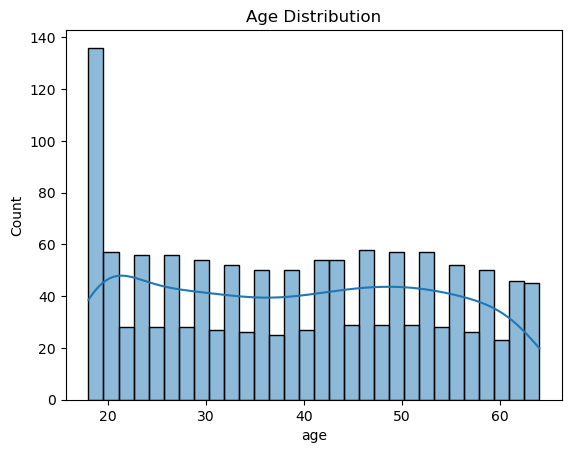

In [131]:
sns.histplot(df['age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.show()

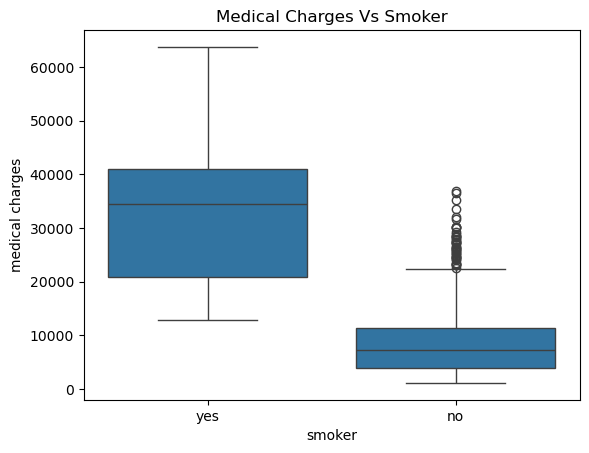

In [132]:
sns.boxplot(x='smoker' , y='medical charges' , data=df)
plt.title('Medical Charges Vs Smoker')
plt.show()

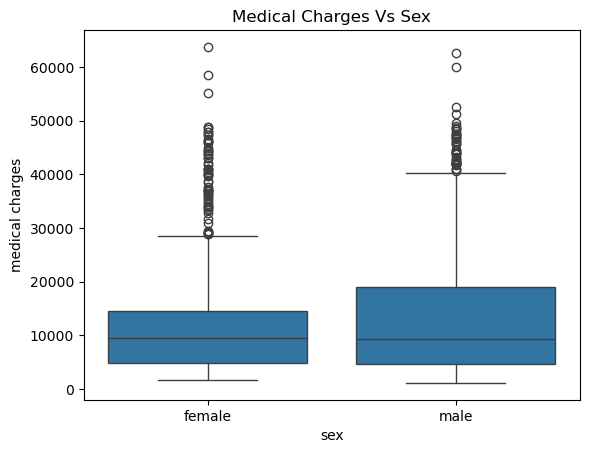

In [133]:
sns.boxplot(x='sex' , y='medical charges' , data=df)
plt.title('Medical Charges Vs Sex')
plt.show()

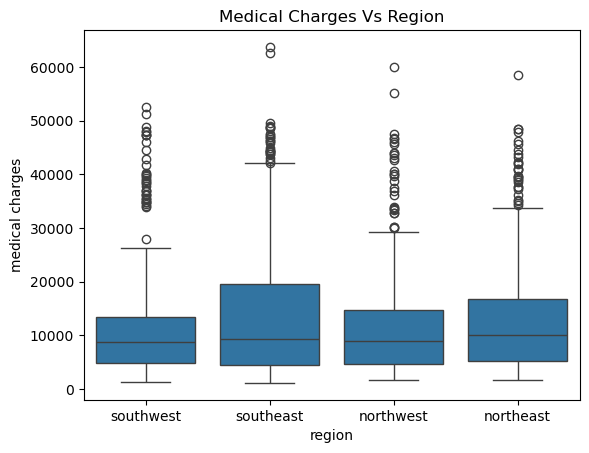

In [134]:
sns.boxplot(x='region' , y='medical charges' , data=df)
plt.title('Medical Charges Vs Region')
plt.show()

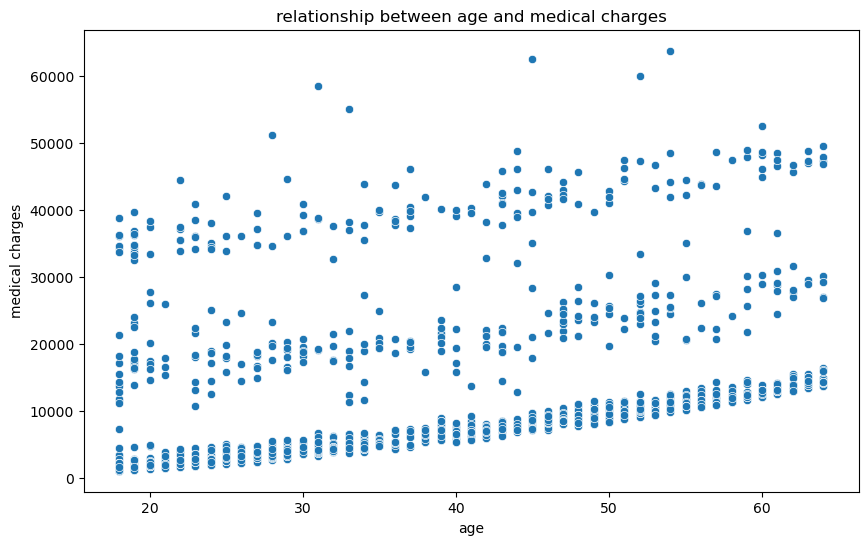

In [135]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age' , y='medical charges' , data=df)
plt.title('relationship between age and medical charges')
plt.xlabel('age')
plt.ylabel('medical charges')
plt.show()

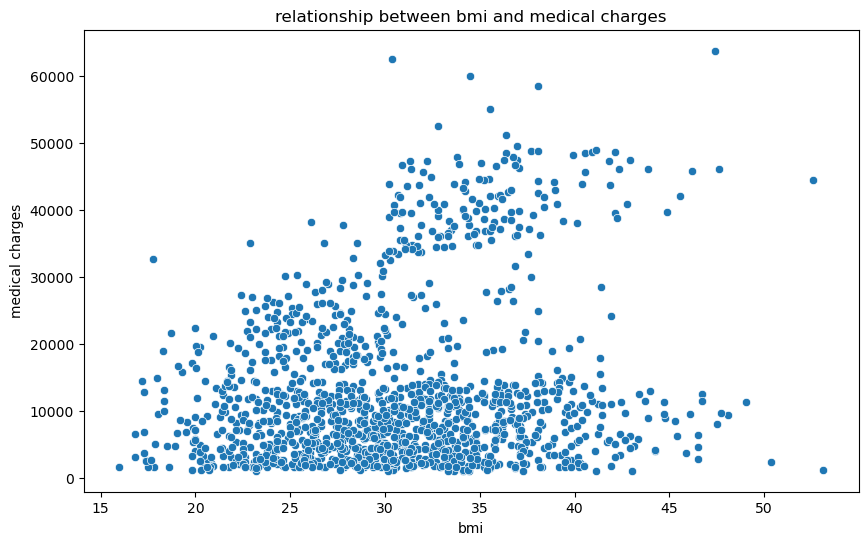

In [136]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi' , y='medical charges' , data=df)
plt.title('relationship between bmi and medical charges')
plt.xlabel('bmi')
plt.ylabel('medical charges')
plt.show()

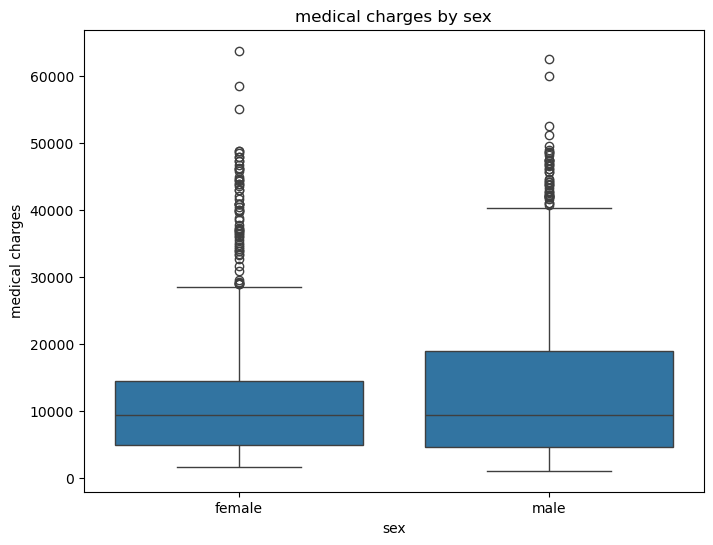

In [137]:
plt.figure(figsize=(8,6))
sns.boxplot(x='sex' , y='medical charges' , data=df)
plt.title('medical charges by sex')
plt.xlabel('sex')
plt.ylabel('medical charges')
plt.show()

In [138]:
df = pd.get_dummies(df , drop_first=True)

In [139]:
X= df.drop('medical charges' , axis=1)
y= df['medical charges']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [140]:
xgb_model = XGBRegressor(n_estimators=80, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost (R2 Score): {r2_xgb * 100:.2f}%")
print(f"(MAE): {mean_absolute_error(y_test, y_pred_xgb):.2f}")

XGBoost (R2 Score): 90.32%
(MAE): 2469.76


In [141]:
with open('medical_insurance_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

print("Model saved successfully as medical_insurance_model.pkl")

Model saved successfully as medical_insurance_model.pkl
